# Working on Real Life Data with Pandas

In this project, we will be getting and analyzing real life data using Pandas.

In the first cell below, we simply import Pandas and refer to it as pd for brevity.
The line "%matplotlib inline" is used to make figures appear within the jupyter notebook
(as opposed to openning them with an external viewer). In some cases, this is the default option and it is not necessary.

In [1]:
%matplotlib inline

import pandas as pd

## Earthquakes in the last 30 days

In the next cell, we get a summary of all the earthquakes that happened in the last 30 days in the US. We obtain this data from usgs.gov using the url https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv. Whenever you access this url, it gives you a .csv file (the extension is short for Comma-Separated Values even though they are not always comma separated) containing data for the most recent 30 days.

The method .read_csv is used to read the contents of the url. The last line simply displays a summary of the data frame.

Note that each time you run the next cell, you will be downloading the data. We should experiment with the data frame in the subsequent cells once it is read to be kind to USGS :)

Please run the following cell and take a minute to inspect the data. What columns are there? Take a look at some of the rows.

In [2]:
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

df_Earthquakes = pd.read_csv(url)

df_Earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-08-05T20:59:31.520Z,35.686667,-117.526667,4.74,1.72,ml,27.0,78.00,0.112900,0.16,...,2020-08-05T21:03:19.926Z,"14km SW of Searles Valley, CA",earthquake,0.30,0.97,0.106,26.0,automatic,ci,ci
1,2020-08-05T20:56:00.040Z,38.134000,-118.084700,0.10,0.90,ml,12.0,205.12,0.082000,0.11,...,2020-08-05T21:00:54.394Z,"28 km S of Mina, Nevada",earthquake,NaN,11.60,NaN,NaN,automatic,nn,nn
2,2020-08-05T20:49:24.150Z,38.124500,-118.079000,7.10,1.70,ml,21.0,119.16,0.050000,0.09,...,2020-08-05T20:57:37.190Z,"29 km S of Mina, Nevada",earthquake,NaN,2.50,NaN,NaN,automatic,nn,nn
3,2020-08-05T20:45:40.090Z,38.154200,-117.948200,11.20,1.80,ml,12.0,82.22,0.029000,0.18,...,2020-08-05T20:50:15.462Z,"29 km SSE of Mina, Nevada",earthquake,NaN,1.20,NaN,NaN,automatic,nn,nn
4,2020-08-05T20:40:42.800Z,19.390167,-154.876007,7.02,2.01,ml,27.0,241.00,NaN,0.13,...,2020-08-05T20:46:13.500Z,"9 km SSE of Leilani Estates, Hawaii",earthquake,0.70,0.57,0.270,5.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14261,2020-07-06T21:21:04.349Z,36.353167,-97.328667,7.89,1.15,ml,27.0,139.00,0.119677,0.20,...,2020-07-14T14:38:02.081Z,"7 km NNW of Perry, Oklahoma",earthquake,NaN,0.80,0.170,6.0,reviewed,ok,ok
14262,2020-07-06T21:20:22.330Z,38.836500,-122.781500,2.01,0.28,md,18.0,62.00,0.007165,0.03,...,2020-07-09T19:55:02.770Z,"5km WNW of Cobb, CA",earthquake,0.27,0.41,NaN,1.0,reviewed,nc,nc
14263,2020-07-06T21:19:49.900Z,38.165800,-117.894300,12.10,1.40,ml,15.0,72.71,0.036000,0.12,...,2020-07-06T21:25:11.103Z,"31 km SE of Mina, Nevada",earthquake,NaN,0.70,NaN,NaN,automatic,nn,nn
14264,2020-07-06T21:19:21.060Z,47.846000,-114.739500,10.36,-0.06,md,7.0,119.00,0.032000,0.10,...,2020-07-08T14:20:30.750Z,"10 km WNW of Niarada, Montana",earthquake,0.39,0.87,0.353,3.0,reviewed,mb,mb


Did you realize that not all the columns are displayed? How do we get all column names?

.columns attribute should help.

(A description of columns can be found at [USGS's web page here](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php).)

In [3]:
print(df_Earthquakes.columns)
print(df_Earthquakes.columns.size)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')
22


By default, Jupyter Notebook only displays the result of the last evaluation after the cell unless there are explicit print/display commands. This is the reason we used print statements in the previous cell.

Okay, now what if we just wanted to see the first 3 rows to quickly check something? The next cell shows us how to do this. Try changing the number and run the cell again. What happens if you call the method without providing a number?

In [4]:
df_Earthquakes.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-08-05T20:59:31.520Z,35.686667,-117.526667,4.74,1.72,ml,27.0,78.00,0.1129,0.16,...,2020-08-05T21:03:19.926Z,"14km SW of Searles Valley, CA",earthquake,0.3,0.97,0.106,26.0,automatic,ci,ci
1,2020-08-05T20:56:00.040Z,38.134000,-118.084700,0.10,0.90,ml,12.0,205.12,0.0820,0.11,...,2020-08-05T21:00:54.394Z,"28 km S of Mina, Nevada",earthquake,NaN,11.60,NaN,NaN,automatic,nn,nn
2,2020-08-05T20:49:24.150Z,38.124500,-118.079000,7.10,1.70,ml,21.0,119.16,0.0500,0.09,...,2020-08-05T20:57:37.190Z,"29 km S of Mina, Nevada",earthquake,NaN,2.50,NaN,NaN,automatic,nn,nn


What about the last 3 rows? It is time for you to Google this if you don't already know the answer.

In [5]:
# write your code in this cell

Of course, it is hard to make sense of the data simply by looking at each individual row, especially when there is so much data. So, we ask Pandas to "describe" it for us. The method .describe gives us various information on numerical columns. 

In [6]:
df_Earthquakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,14266.000000,14266.000000,14266.000000,14265.000000,10163.000000,11375.000000,10517.000000,14265.000000,8560.000000,14265.000000,9043.000000,9365.000000
mean,39.538698,-116.485432,18.241297,1.453700,19.431270,113.340705,0.417586,0.257523,1.462124,7.469502,0.220270,15.639402
std,16.340422,54.901507,46.254378,1.110515,13.910696,54.961676,1.883702,0.258435,2.797120,611.984025,0.318354,29.673399
min,-65.352200,-179.976200,-3.510000,-1.430000,2.000000,13.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,35.689542,-148.467550,3.600000,0.770000,11.000000,72.000000,0.021000,0.090000,0.270000,0.440000,0.111000,5.000000
50%,38.155000,-118.076000,7.520000,1.200000,16.000000,102.990000,0.048350,0.160000,0.430000,0.730000,0.166000,10.000000
75%,51.589875,-117.366250,13.000000,1.840000,23.000000,144.000000,0.107900,0.350000,0.750000,1.590000,0.231000,17.000000
max,87.349200,179.949500,633.360000,7.800000,196.000000,355.000000,45.885000,2.170000,26.400000,73091.100000,5.180000,726.000000


As we can see df_Earthquakes.describe() shows us count, mean, standard deviation, and various percentiles of our data for each numerical column. This might be good enough for some purposes but certainly not all.

For simplicity let's focus on only three columns of our data: latitude, longitude and magnitude. We use the following syntax to restrict to some of the columns. Let's also rename them while we are at it.

In [7]:
df_Simple = df_Earthquakes[['latitude', 'longitude', 'mag']]
df_Simple = df_Simple.rename(
    columns = {'latitude': 'Latitude',
               'longitude': 'Longitude',
               'mag': 'Magnitude'}
)
df_Simple

,Latitude,Longitude,Magnitude
0,35.686667,-117.526667,1.72
1,38.134000,-118.084700,0.90
2,38.124500,-118.079000,1.70
3,38.154200,-117.948200,1.80
4,19.390167,-154.876007,2.01
...,...,...,...
14261,36.353167,-97.328667,1.15
14262,38.836500,-122.781500,0.28
14263,38.165800,-117.894300,1.40
14264,47.846000,-114.739500,-0.06


In [8]:
df_Simple.describe()

,Latitude,Longitude,Magnitude
count,14266.000000,14266.000000,14265.000000
mean,39.538698,-116.485432,1.453700
std,16.340422,54.901507,1.110515
min,-65.352200,-179.976200,-1.430000
25%,35.689542,-148.467550,0.770000
50%,38.155000,-118.076000,1.200000
75%,51.589875,-117.366250,1.840000
max,87.349200,179.949500,7.800000


Next, we investigate the distribution of magnitudes of the earthquakes. For this purpose, we will get a histogram of our data. It is possible to call the .hist method of a data frame with various different parameters. Please investigate them from [this link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) and try some for yourself. Also, simply try changing the number of bins we are using in the next cell.

<AxesSubplot:>

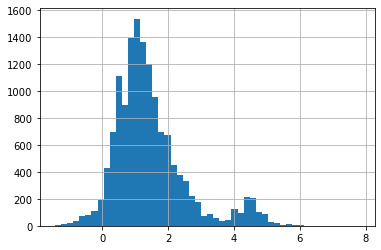

In [9]:
df_Simple['Magnitude'].hist(bins=50)

It appears there are two different peaks here. That's interesting. Why is it not a simple bell curve like figure?

(Insert reference to Jurassic Park here.)

This is because our data comes from at least two different "families". In this context, this means the numerical magnitude we read from each row might be measured in a different way. Indeed, the column "magType" keeps a record of the algorithm/method used to calculated the magnitude.

Let's group data that has the same "magType" together and count how many of each type we have.

In [10]:
dfGroupByMagnitudeTypes = df_Earthquakes.groupby('magType')
dfGroupByMagnitudeTypes.count()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
magType,,,,,,,,,,,,,,,,,,,,,
mb,806,806,806,806,806,0,806,806,806,806,...,806,806,806,806,806,806,806,806,806,806
mb_lg,20,20,20,20,20,0,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
md,3335,3335,3335,3335,3335,3335,3335,2981,3335,3335,...,3335,3335,3335,3335,3335,3042,3335,3335,3335,3335
mh,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,4
ml,9969,9969,9969,9969,9969,6816,7080,6576,9969,9969,...,9969,9969,9969,4265,9969,5057,5074,9969,9969,9969
mw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,0,8,8,8,8
mwr,25,25,25,25,25,0,25,25,25,25,...,25,25,25,25,25,21,21,25,25,25
mww,98,98,98,98,98,0,97,97,98,98,...,98,98,98,97,98,97,97,98,98,98


Next, we will plot a histogram of magnitudes again but using only one type of measurement this time. At a quick glance at the above cell, we see most of the measurements are of type "ml". So we will focus on measurements of that type.

The following cell first filters the data and then plots a histogram.

<AxesSubplot:>

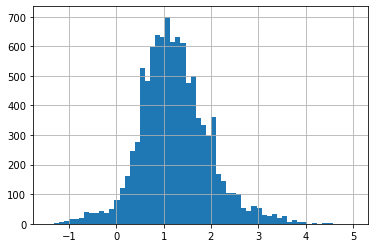

In [11]:
df_ml = df_Earthquakes.loc[(df_Earthquakes.magType == 'ml')]
df_ml['mag'].hist(bins=60)

##### Now, it is your turn:

Do similar histogram plots for other types as well. Compare them to the original histogram plot which uses all the data.

In [12]:
# Your code here

Next, we check to see that the magnitude data from the data frame df_ml satisfies Chebyshev's inequality.

In [13]:
import numpy as np

magnitudes = df_ml['mag'] # this will be interpreted as a numpy array of numbers
magMean = magnitudes.mean()
magVariance = magnitudes.var()
numDataPoints = magnitudes.shape[0] # number of data points in use

def chebyshevLHS(t):
    normalizedMags = magnitudes - magMean # note that here we are subtracting a number from an array!
    absValues = np.abs(normalizedMags)
    count = np.sum(absValues >= t)
    probability = count / numDataPoints
    return probability

def chebyshevRHS(t):
    return magVariance/t**2

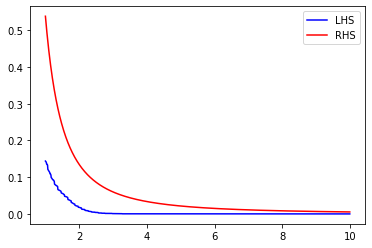

In [14]:
import matplotlib.pyplot as plt

a = 1
b = 10
n = 1000
tValues = np.linspace(a, b, n) # take n (evenly spaced) numbers from the interval [a,b)
y1Values = [chebyshevLHS(t) for t in tValues] # compute the LHS at each one of the t-values
y2Values = [chebyshevRHS(t) for t in tValues] # compute the RHS at each one of the t-values

plt.plot(tValues, y1Values, 'blue', label = 'LHS')
plt.plot(tValues, y2Values, 'red', label = 'RHS')
# Chebyshev's inequality claims that the red curve is always above the blue one

plt.legend()
plt.show()

###### Exercises:
Confirm that the cells above compute the LHS and the RHS of Chebyshev's inequality correctly. Make sure you understand the code.

Change a and b to investigate the inequality for different values of t. 

Use different data sets to (empirically) confirm Chebyshev's inequality. You may use magnitude data from different types of measurements, all the magnitude data or something completely different (not necessarily from this data set).

### What's next?

Think about what things you can do with this data, now. For example, you may want to create a heat map of based on latitude and longitude. That can tell where there are Earthquakes the most often in the US. This [link](https://www.geeksforgeeks.org/plot-2-d-histogram-in-python-using-matplotlib/) is a good place to start if you want to head in this direction.

## Stock market data

Next, we move on to downloading stock market data from Yahoo Finance. 


#### A little digression
When we request historical data from Yahoo Finance's API, we need to provide a time interval. So we need a way to communicate the date and time for the end points of our interval. They are using [the Unix timestamp](https://www.unixtimestamp.com/index.php) to mark the time. The Unix timestamp is just a way to measure time in seconds where we center the time axis at the beginning of 1970 UTC. So a timestamp of 0 refers to 01/01/1970 00:00:00 am in UTC time and a timestamp of 70 refers to 70 seconds after that, in other words 01/01/1970 00:01:10 am in UTC time and so on. Since this is a very standard way to coordinate time across different computers, in practice all major programming languages provide standard tools to compute timestamps and it is easy to use.

For our purposes, we get two unix timestamps in the next cell. One corresponding to the beginning of 12/31/2019 and the other corresponding to the current time (whenever you are running the cell). Then, we just take the integer parts of those numbers and turn them into strings.

In [15]:
import math, datetime

beginningDateTime = datetime.datetime(year = 2019, month = 12, day = 31)
timestamp1 = math.floor(beginningDateTime.timestamp())
timestamp1 = str(timestamp1)

currentDateTime = datetime.datetime.now()
timestamp2 = math.floor(currentDateTime.timestamp())
timestamp2 = str(timestamp2)
print(timestamp1, timestamp2)

1577768400 1596661477


In the next cell, we define a function that takes two timestamps and a stock symbol and returns the Yahoo Finance URL that provides you the daily historical data between those two timestamps. The stock symbol for Google is GOOG, for Apple it is AAPL and for Boeing it is BA. Needless to say you may Google the stock symbols of other companies if you are curious to get their data as well.

In [86]:
def historicalDataURL(beginTimestamp, endTimestamp, symbol):
    return "https://query1.finance.yahoo.com/v7/finance/download/" + \
        symbol + "?period1=" + beginTimestamp + "&period2=" + endTimestamp + "&interval=1d&events=history"

url_Google = historicalDataURL(timestamp1, timestamp2, 'GOOG')
url_Apple = historicalDataURL(timestamp1, timestamp2, 'AAPL')
url_Boeing = historicalDataURL(timestamp1, timestamp2, 'BA')

print(url_Google)

https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1577768400&period2=1596661477&interval=1d&events=history


In [87]:
df_Google = pd.read_csv(url_Google)
df_Apple = pd.read_csv(url_Apple)
df_Boeing = pd.read_csv(url_Boeing)

df_Google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800
1,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
4,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
...,...,...,...,...,...,...,...
146,2020-07-30,1497.000000,1537.869995,1492.219971,1531.449951,1531.449951,1671400
147,2020-07-31,1505.010010,1508.949951,1454.030029,1482.959961,1482.959961,3439900
148,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,1474.449951,2330200
149,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,1464.969971,1903500


For simplicity we will focus on columns named "Close". In these data frames, Close column gives us the price of a single stock in USD at the end of the day. So first we will create new data frames that only keep the date and the closing price information. Then, we combine all the data into a single data frame using an "inner join on Date". This simply merges the data based on a common key (in this case the "Date" column acts as a key). So, all the rows on different data frames which contain the same date will be merged to form a single row in the new data frame. If you would like to learn more about the inner join operation and other operations similar to it, you may search for "Relational Algebra". 

In the next cell, we define a function that returns the inner join of two data frames and then use it twice to merge all three data frames.

,Date,Google,Apple,Boeing
0,2019-12-31,1337.020020,293.649994,325.760010
1,2020-01-02,1367.369995,300.350006,333.320007
2,2020-01-03,1360.660034,297.429993,332.760010


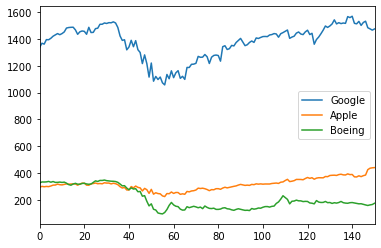

In [88]:
df_GoogleClose = df_Google[['Date', 'Close']].rename(columns = {'Close': 'Google'})
df_AppleClose = df_Apple[['Date', 'Close']].rename(columns = {'Close': 'Apple'})
df_BoeingClose = df_Boeing[['Date', 'Close']].rename(columns = {'Close': 'Boeing'})

def innerJoinOnDate(df1, df2):
    return df1.join(df2.set_index('Date'), on='Date', how='inner')
    
df_Combined = innerJoinOnDate(df_GoogleClose, df_AppleClose)
df_Combined = innerJoinOnDate(df_Combined, df_BoeingClose)

df_Combined.plot()
df_Combined.head(3)

Next, we compute the correlation matrix for the stock price data.

In [84]:
df_Combined.corr()

,Google,Apple,Boeing
Google,1.000000,0.839289,0.458116
Apple,0.839289,1.000000,0.083283
Boeing,0.458116,0.083283,1.000000


We see that Apple and Google are highly correlated but the correlation between Apple and Boeing is relatively low. Perhaps, what is surprising is Google and Boeing are still significantly correlated.

(Of course, this comment may not make sense if you run this code far enough in the future.)

## Stock Market and COVID-19

In [20]:
df_Covid = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
df_Covid

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
34853,2020-08-01,Zimbabwe,77.0,14.0,3169.0,67.0,873.0,35.0,1749.0,43.0
34854,2020-08-02,Zimbabwe,490.0,2.0,3659.0,69.0,1225.0,35.0,2181.0,44.0
34855,2020-08-03,Zimbabwe,262.0,1.0,3921.0,70.0,1409.0,36.0,2310.0,45.0
34856,2020-08-04,Zimbabwe,154.0,10.0,4075.0,80.0,1371.0,44.0,2362.0,54.0


In [21]:
df_Covid.loc[(df_Covid.location == 'World')]

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
34243,2019-12-31,World,27.0,0.0,27.0,0.0,NaN,NaN,NaN,NaN
34244,2020-01-01,World,0.0,0.0,27.0,0.0,NaN,NaN,NaN,NaN
34245,2020-01-02,World,0.0,0.0,27.0,0.0,NaN,NaN,NaN,NaN
34246,2020-01-03,World,17.0,0.0,44.0,0.0,NaN,NaN,NaN,NaN
34247,2020-01-04,World,0.0,0.0,44.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
34457,2020-08-01,World,278896.0,6209.0,17580519.0,679488.0,1814594.0,40015.0,3536868.0,82296.0
34458,2020-08-02,World,262131.0,5777.0,17842650.0,685265.0,1817240.0,40014.0,3569030.0,83104.0
34459,2020-08-03,World,222876.0,3970.0,18065526.0,689235.0,1808302.0,40017.0,3582568.0,83225.0
34460,2020-08-04,World,204110.0,4498.0,18269636.0,693733.0,1800179.0,39857.0,3585279.0,83615.0
